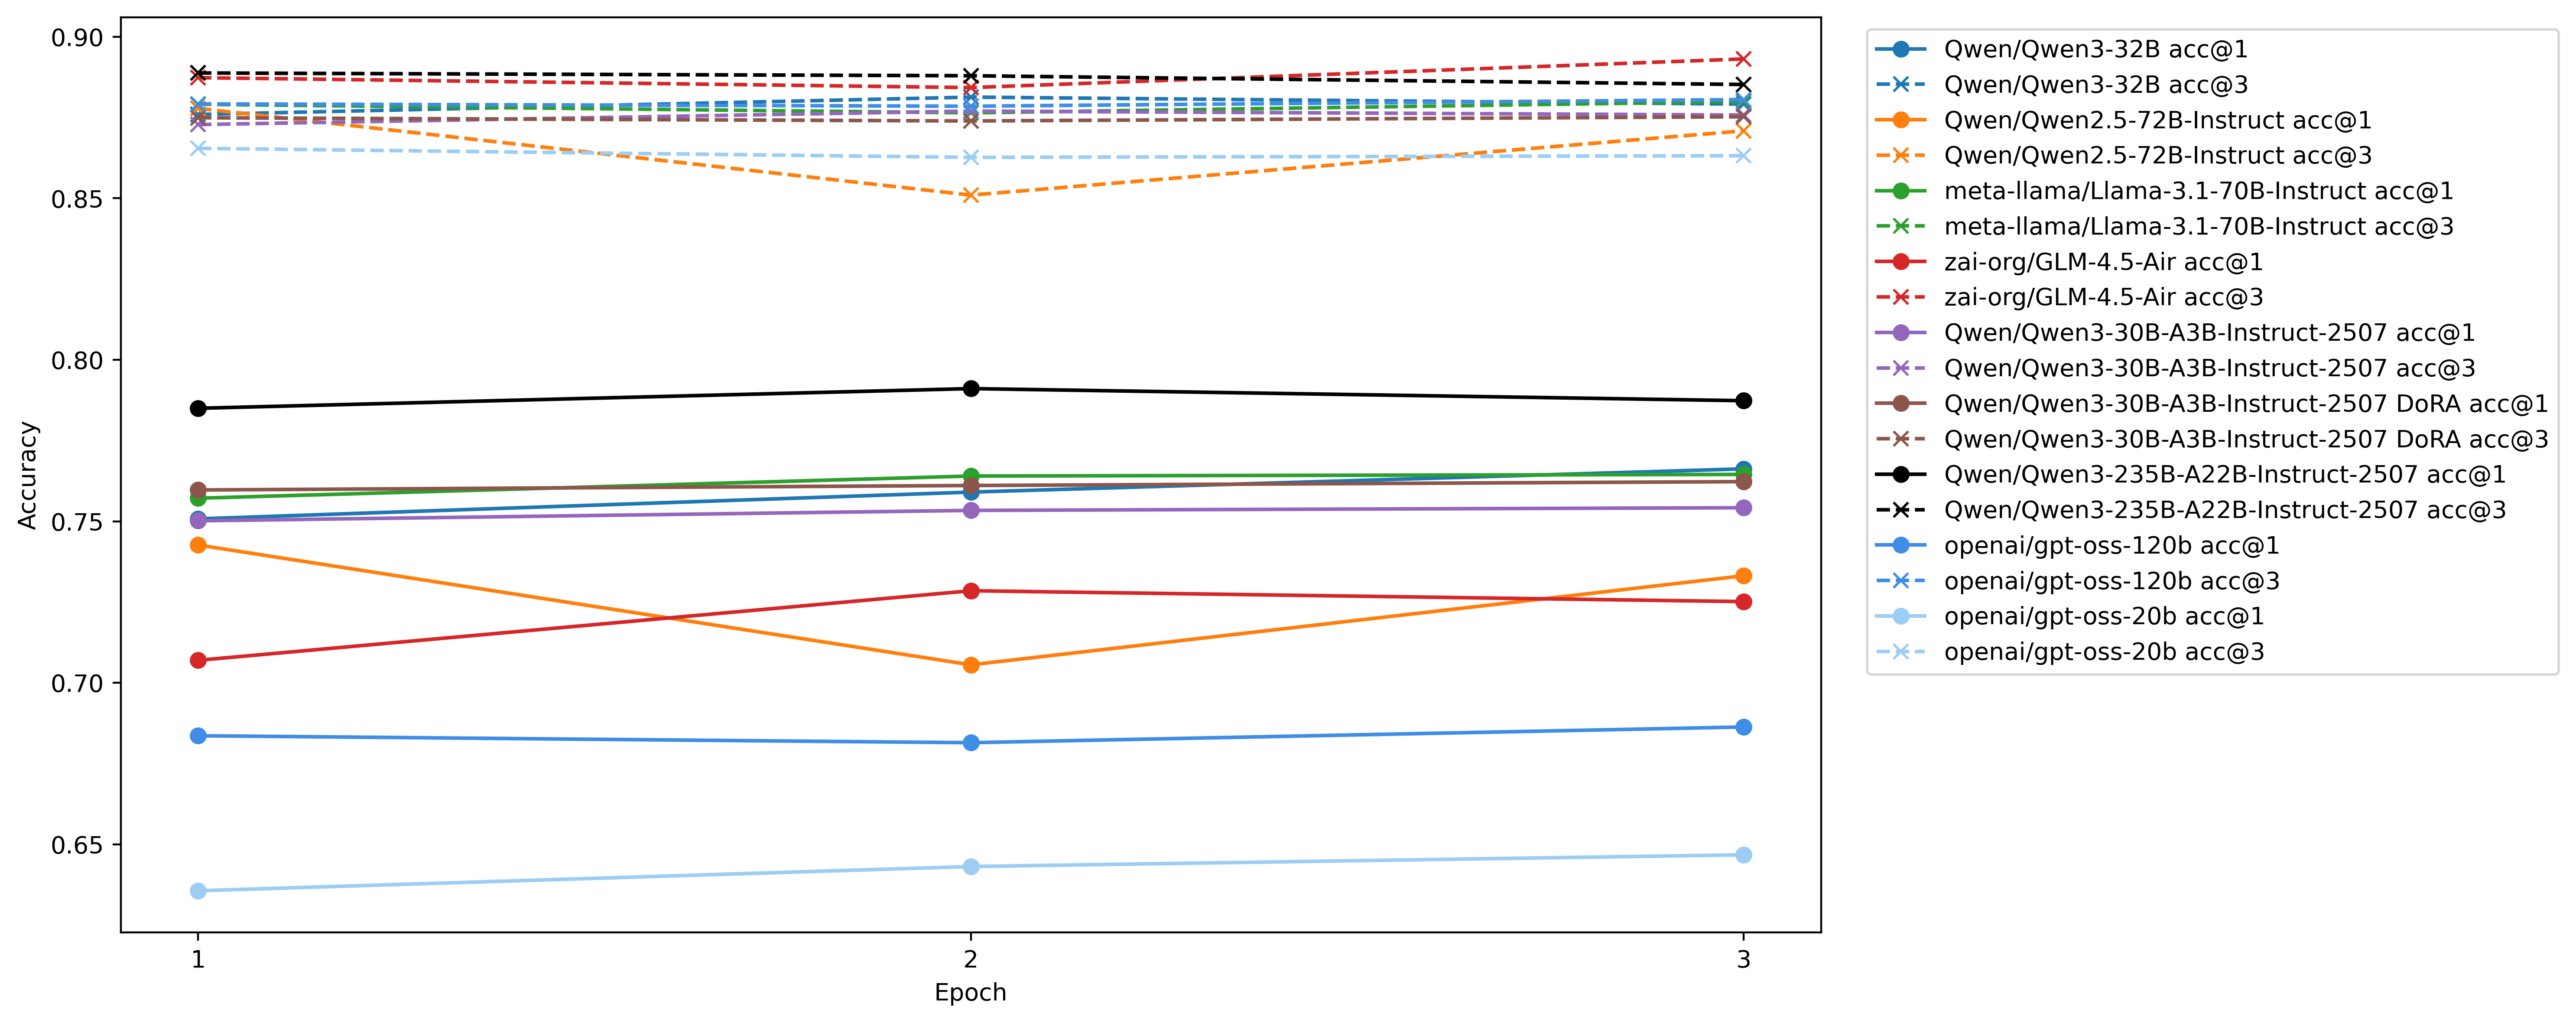

In [2]:
import matplotlib.pyplot as plt

color_map = {
    "Qwen/Qwen3-32B": "#1f77b4",
    "Qwen/Qwen2.5-72B-Instruct": "#ff7f0e",
    "meta-llama/Llama-3.1-70B-Instruct": "#2ca02c",
    "zai-org/GLM-4.5-Air": "#d62728",
    "Qwen/Qwen3-30B-A3B-Instruct-2507": "#9467bd",
    "Qwen/Qwen3-30B-A3B-Instruct-2507 DoRA": "#8c564b",
    "openai/gpt-oss-120b": "#3f8de7",
    "openai/gpt-oss-20b": "#9bcdf5"
}

data = [
    ("1", "Qwen/Qwen3-32B", 0.7507443895318702, 0.87592688538857),
    ("2", "Qwen/Qwen3-32B", 0.7590388022978622, 0.8813012310715873),
    ("3", "Qwen/Qwen3-32B", 0.7662293925285664, 0.8791429092415669),
    
    ("1", "Qwen/Qwen2.5-72B-Instruct", 0.742660184289581, 0.8778256739170969),
    ("2", "Qwen/Qwen2.5-72B-Instruct", 0.7055759864116105, 0.8509685088028277),
    ("3", "Qwen/Qwen2.5-72B-Instruct", 0.7331386401040277, 0.8708796783323344),
    
    ("1", "meta-llama/Llama-3.1-70B-Instruct", 0.7571382840174125, 0.8790863119210861),
    ("2", "meta-llama/Llama-3.1-70B-Instruct", 0.7640102106039417, 0.8764299932932479),
    ("3", "meta-llama/Llama-3.1-70B-Instruct", 0.7645092280177705, 0.8799308957873524),
    
    ("1", "zai-org/GLM-4.5-Air", 0.7069647620334496, 0.8873170802973593),
    ("2", "zai-org/GLM-4.5-Air", 0.728499398966634, 0.8842525385819175),
    ("3", "zai-org/GLM-4.5-Air", 0.725135991211487, 0.8931211045112158),
    
    ("1", "Qwen/Qwen3-30B-A3B-Instruct-2507", 0.7501443485324408, 0.8728005929336264),
    ("2", "Qwen/Qwen3-30B-A3B-Instruct-2507", 0.7533717892265589, 0.8769859497356121),
    ("3", "Qwen/Qwen3-30B-A3B-Instruct-2507", 0.7541976798445793, 0.875755788066712),
    
    ("1", "Qwen/Qwen3-30B-A3B-Instruct-2507 DoRA", 0.759693387288975, 0.8749146579479674),
    ("2", "Qwen/Qwen3-30B-A3B-Instruct-2507 DoRA", 0.7610761872194934, 0.8739198774066207),
    ("3", "Qwen/Qwen3-30B-A3B-Instruct-2507 DoRA", 0.7622731032779372, 0.8752216191892774),
    
    ("1", "Qwen/Qwen3-235B-A22B-Instruct-2507", 0.7849785527632008, 0.8887697552767468),
    ("2", "Qwen/Qwen3-235B-A22B-Instruct-2507", 0.7910729646324846, 0.8879157700919238),
    ("3", "Qwen/Qwen3-235B-A22B-Instruct-2507", 0.7873260029091, 0.8852075107882833),
    
    ("1", "openai/gpt-oss-120b", 0.6836166535886725, 0.8792079973813675),
    ("2", "openai/gpt-oss-120b", 0.6814633808828001, 0.8784881884213533),
    ("3", "openai/gpt-oss-120b", 0.686323442789569, 0.8805406015264303),
    
    ("1", "openai/gpt-oss-20b", 0.6356273742209825, 0.8654519520801693),
    ("2", "openai/gpt-oss-20b", 0.643133916455475, 0.8626478255008294),
    ("3", "openai/gpt-oss-20b", 0.6467555372669685, 0.8631687963552379),
]

def r_to_int(r):
    return int(r.replace("r", ""))

categories = {}
for r, cat, acc1, acc3 in data:
    categories.setdefault(cat, [])
    categories[cat].append((r_to_int(r), acc1, acc3))

plt.figure(figsize=(15, 6), dpi=400)

for cat, vals in categories.items():
    vals = sorted(vals, key=lambda x: x[0])
    r_vals = [v[0] for v in vals]
    acc1_vals = [v[1] for v in vals]
    acc3_vals = [v[2] for v in vals]

    color = color_map.get(cat, "black")

    plt.plot(
        r_vals, acc1_vals,
        marker="o",
        color=color,
        linestyle="-",
        label=f"{cat} acc@1"
    )
    plt.plot(
        r_vals, acc3_vals,
        marker="x",
        color=color,
        linestyle="--",
        label=f"{cat} acc@3"
    )

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="upper left", bbox_to_anchor=(1.02, 1.0))
r_ticks = [1, 2, 3]
plt.xticks(r_ticks)
plt.tight_layout()
plt.show()